In [1]:
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as sts
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

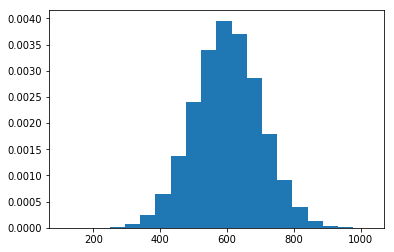

In [64]:
x=np.random.normal(loc=600, scale=100, size=100000)
# y, x=np.histogram(x, density=True)
plt.hist(x, density=True, bins=20)
a_list=[]
b_list=[]
for each_x in x: 
    if each_x<641: 
        a_list.append(each_x)
#     else: 
#         b_list.append(each_x)
plt.show()
z=len(a_list)/len(x)

In [34]:
x=[650, 730, 510, 670, 480, 800, 690, 530, 590, 620, 710, 670, 
   640, 780, 650, 490, 800, 600, 510, 700]
np.mean(x)

641.0

In [35]:
np.std(x)

97.56536270623914

In [ ]:
(641-600)/

In [32]:
z

0.6585

In [33]:
(641-600)/100

0.41

0      2
1      4
2      4
3      5
4      1
      ..
480    3
481    1
482    4
483    4
484    3
Name: Outside Time Spent, Length: 468, dtype: int64

In [361]:
file_path=os.path.join('static', 'data', 'data.csv')

In [362]:
df=pd.read_csv(file_path)
df=df.drop(['Course Name', 'Submission Date'], axis=1)
df['Student Name']=df['Student Name'].astype('str')
df=df[~df['Student Name'].isin(['Olivia Booth', 'Natasha Albert'])]#, 'Test 1', 'Test 2'])]
df=df[~df['Student Name'].isin(['33', '16'])]
df=df[~df['Week'].isin([4, 5])]
time_map={'0-5 hrs': 5, 
        '6-10 hrs': 4, 
        '11-15 hrs': 3, 
        '15-20 hrs': 2, 
        '+20 hrs': 1}
df['Outside Time Spent']=df['Outside Time Spent'].map(time_map)
df
# df.dtypes

,Week,Student Name,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating,Outside Time Spent
0,1,1,3,3,4,4,4,3,3,3,2
1,1,2,4,4,4,4,4,5,5,0,4
2,1,3,4,4,5,4,5,5,4,0,4
3,1,4,4,2,3,5,4,5,4,3,5
4,1,5,5,3,5,5,5,5,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...
480,13,4,5,4,4,3,4,4,4,5,3
481,13,36,5,3,5,5,5,5,5,5,1
482,13,35,2,3,4,1,3,1,3,4,3
483,13,38,4,4,4,4,4,4,4,4,4


In [356]:
def rand_jitter(arr):
    stdev = .1 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev * .4

Week       First    Second
Week                      
First   1.000000  0.613781
Second  0.613781  1.000000


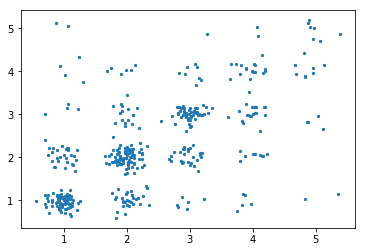

In [359]:
metric_df=df['']
df_list=[]
pivot_df=metric_df.pivot(columns='Week', index='Student Name').stack(level=0)
for i in range(len(week_list)-1): 
    two_weeks_df=pivot_df.iloc[:, [i, i+1]]
    columns_mapper={two_weeks_df.columns[0]: 'First', 
                    two_weeks_df.columns[1]: 'Second'}
    two_weeks_df=two_weeks_df.rename(columns=columns_mapper)
    df_list.append(two_weeks_df)
combined_df=pd.concat(df_list, axis=0)
plt.scatter(x=rand_jitter(combined_df['First']), y=rand_jitter(combined_df['Second']), s=5)
print(combined_df.corr())

In [352]:
# df[df['Week'].isin([1, 2])].pivot(columns='Week', index='Student Name').stack(level=0).corr()
week_list=df['Week'].unique()
metrics={}
for each_metric in feature_columns: 
    metric_df=df[['Week', 'Student Name', each_metric]]
    corr_df=metric_df.pivot(columns='Week', index='Student Name').stack(level=0).corr()
    corr_data={}
    for i in range(len(week_list)-1): 
        date_range=f'week{week_list[i]}-week{week_list[i+1]}'
        corr_data[date_range]=round(corr_df.iloc[i, i+1], 2)
    metrics[each_metric]=corr_data
display(pd.DataFrame(metrics).mean())#.style.background_gradient()
display(pd.DataFrame(metrics).median())
display(pd.DataFrame(metrics))


Overall Satisfaction            0.416667
Class Pace                      0.460833
Academic Support                0.447500
Apply Learning Outside Class    0.507500
Instructor Engagement           0.512500
Instructor Clarity              0.369167
Instructor Knowledge            0.417500
Homework Feedback Rating        0.384167
Outside Time Spent              0.651667
dtype: float64

Overall Satisfaction            0.485
Class Pace                      0.470
Academic Support                0.495
Apply Learning Outside Class    0.495
Instructor Engagement           0.565
Instructor Clarity              0.430
Instructor Knowledge            0.430
Homework Feedback Rating        0.405
Outside Time Spent              0.635
dtype: float64

,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating,Outside Time Spent
week1-week2,0.45,0.41,0.53,0.38,0.58,0.40,0.43,0.41,0.61
week2-week3,0.63,0.47,0.46,0.47,0.49,0.28,0.35,0.28,0.63
week3-week4,0.46,0.51,-0.19,0.21,0.36,0.39,0.33,0.19,0.54
week4-week5,-0.20,0.51,0.30,0.46,0.16,0.13,0.26,0.33,0.58
week5-week6,-0.03,0.32,0.21,0.51,0.27,-0.04,0.06,0.28,0.60
week6-week7,0.51,0.42,0.46,0.59,0.63,0.46,0.67,0.23,0.80
week7-week8,0.51,0.59,0.47,0.44,0.53,0.25,0.48,0.45,0.76
week8-week9,0.44,0.40,0.52,0.60,0.68,0.47,0.41,0.63,0.71
week9-week10,0.47,0.61,0.54,0.68,0.69,0.52,0.54,0.40,0.73
week10-week11,0.61,0.47,0.70,0.75,0.63,0.48,0.55,0.50,0.43


In [198]:
diff_df=df.sort_values(['Student Name', 'Week']).groupby('Student Name').diff()
diff_df=diff_df.dropna()
diff_df.corr()

,Week,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating,Outside Time Spent
Week,1.000000,0.076333,0.031221,-0.043716,-0.008598,-0.061916,0.011416,0.041457,0.044449,0.054122
Overall Satisfaction,0.076333,1.000000,0.096877,0.417899,0.449002,0.441706,0.531898,0.486544,0.137591,0.012375
Class Pace,0.031221,0.096877,1.000000,0.121274,-0.006349,0.176825,0.138147,0.143597,-0.047300,-0.047085
Academic Support,-0.043716,0.417899,0.121274,1.000000,0.273808,0.442165,0.425647,0.422872,0.072715,0.032408
Apply Learning Outside Class,-0.008598,0.449002,-0.006349,0.273808,1.000000,0.391139,0.402483,0.267880,0.109630,0.079778
Instructor Engagement,-0.061916,0.441706,0.176825,0.442165,0.391139,1.000000,0.677554,0.546682,0.038842,-0.036901
Instructor Clarity,0.011416,0.531898,0.138147,0.425647,0.402483,0.677554,1.000000,0.599884,0.053283,0.034918
Instructor Knowledge,0.041457,0.486544,0.143597,0.422872,0.267880,0.546682,0.599884,1.000000,-0.024563,-0.112528
Homework Feedback Rating,0.044449,0.137591,-0.047300,0.072715,0.109630,0.038842,0.053283,-0.024563,1.000000,-0.216522
Outside Time Spent,0.054122,0.012375,-0.047085,0.032408,0.079778,-0.036901,0.034918,-0.112528,-0.216522,1.000000


In [225]:
diff_df=diff_df.applymap(lambda x: 'Increase' if x>0 else ('Neutral' if x==0 else 'Decrease'))

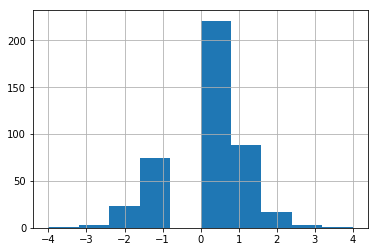

In [220]:
diff_df['Instructor Clarity'].hist()

In [226]:
feature_columns=['Overall Satisfaction', 'Class Pace', 
                 'Academic Support', 'Apply Learning Outside Class', 
                 'Instructor Engagement', 'Instructor Clarity', 
                 'Instructor Knowledge', 'Homework Feedback Rating', 
                 'Outside Time Spent']
X=diff_df[feature_columns].drop(columns=['Overall Satisfaction'])
# lb=LabelEncoder()
# X['Outside Time Spent']=lb.fit_transform(X['Outside Time Spent'])
Y=diff_df['Overall Satisfaction']
# clf=RandomForestClassifier()
clf=DecisionTreeClassifier()
clf.fit(X, Y)
display(sorted(list(zip(clf.feature_importances_, X.columns)), reverse=True))
clf.score(X, Y)

ValueError: could not convert string to float: 'Increase'

In [224]:
diff_df['Overall Satisfaction']

42     0.0
108    1.0
140    0.0
142   -1.0
182    1.0
      ... 
307    0.0
370    2.0
400   -1.0
431    1.0
470   -1.0
Name: Overall Satisfaction, Length: 431, dtype: float64

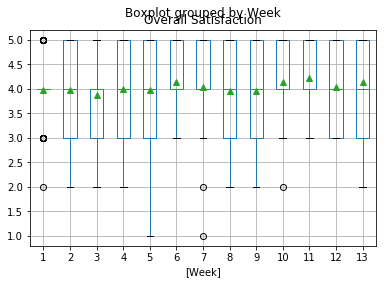

In [218]:
df[['Week', 'Overall Satisfaction']].boxplot(by='Week', showmeans=True)
plt.show()

In [164]:
pivot_df

Week,1,2,3,4,5,6,7,8,9,10,11,12,13
Student Name,,,,,,,,,,,,,
Aishwarya rao Ala,5.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0
Alyson Amtman,3.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0
Andre Shearer,3.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0,3.0
Anna Kantor,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
Anna Sours,3.0,5.0,4.0,5.0,4.0,5.0,3.0,4.0,2.0,4.0,3.0,3.0,4.0
Austin Olea,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Bailey Taber,4.0,3.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0
Bryce Wilkinson,3.0,3.0,NaN,NaN,3.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,3.0
Catherine Poirier,5.0,5.0,4.0,5.0,3.0,5.0,3.0,4.0,3.0,4.0,5.0,4.0,5.0


line btw 1&2 - 0.61 a: 3.972972972972973 vs. b: 4.033538083538083


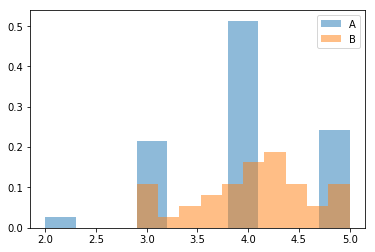

line btw 2&3 - 0.43 a: 3.972972972972973 vs. b: 4.039803439803441


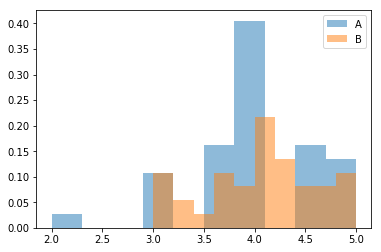

line btw 3&4 - 0.13 a: 3.9324324324324325 vs. b: 4.054954954954955


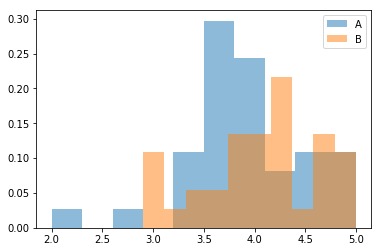

line btw 4&5 - 0.15 a: 3.9459459459459465 vs. b: 4.060060060060059


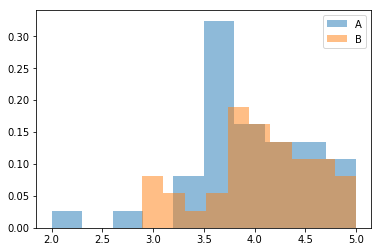

line btw 5&6 - 0.17 a: 3.950450450450451 vs. b: 4.070945945945946


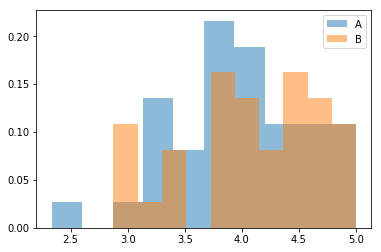

line btw 6&7 - 0.32 a: 3.983333333333334 vs. b: 4.0617760617760625


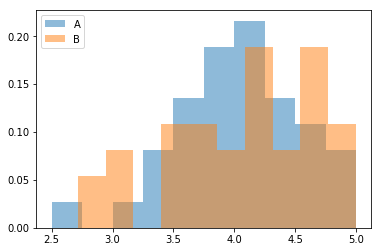

line btw 7&8 - 0.33 a: 3.992277992277992 vs. b: 4.067567567567566


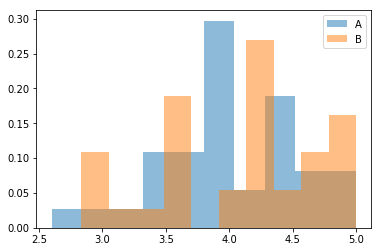

line btw 8&9 - 0.15 a: 3.987451737451737 vs. b: 4.0918918918918905


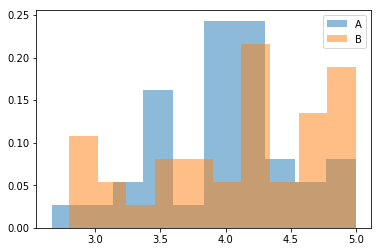

line btw 9&10 - 0.06 a: 3.9822501072501084 vs. b: 4.128378378378378


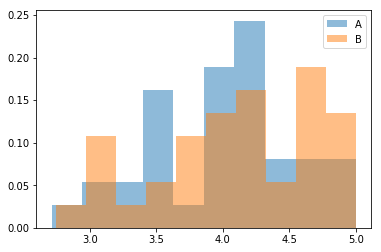

line btw 10&11 - 0.07 a: 3.9981231231231233 vs. b: 4.126126126126126


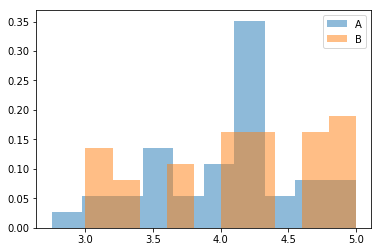

line btw 11&12 - 0.49 a: 4.018618618618619 vs. b: 4.081081081081081


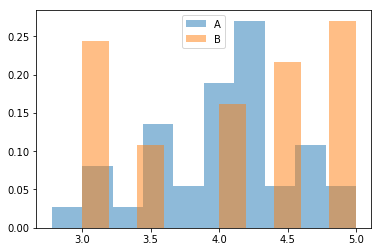

line btw 12&13 - 0.35 a: 4.01941031941032 vs. b: 4.135135135135135


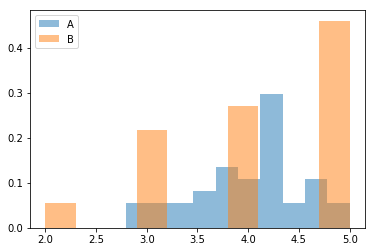

In [173]:
metric='Overall Satisfaction'
pivot_df=df[[metric, 'Student Name', 'Week']].pivot(values=metric,
                                                           index='Student Name', 
                                                           columns='Week')
# display(pivot_df)
for i in range(1, df['Week'].nunique()):
    a_list=pivot_df.iloc[:, 0:i].mean(axis=1)
    b_list=pivot_df.iloc[:, i:].mean(axis=1)
    plt.hist(a_list, weights=np.ones(len(a_list)) / len(a_list), alpha=0.5, label='A')
    plt.hist(b_list, weights=np.ones(len(b_list)) / len(b_list), alpha=0.5, label='B')
    t, p=sts.ttest_rel(a_list, b_list)
    print(f"line btw {i}&{i+1} - {round(p, 2)} a: {a_list.mean()} vs. b: {b_list.mean()}")
    plt.legend()
    plt.show()
#     print(f'{i} - {round(sts.ttest_rel(a_list, b_list)[1], 2)}')

line btw 1&2 - 0.69 a: 4.029478458049887 vs. b: 3.973684210526316


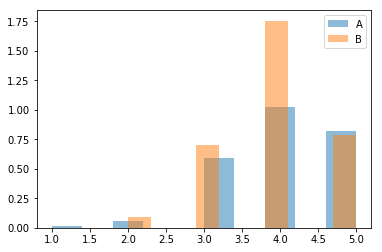

line btw 2&3 - 0.46 a: 4.037220843672457 vs. b: 3.960526315789474


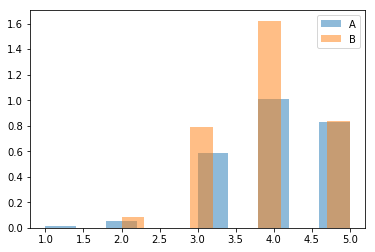

line btw 3&4 - 0.16 a: 4.053763440860215 vs. b: 3.925233644859813


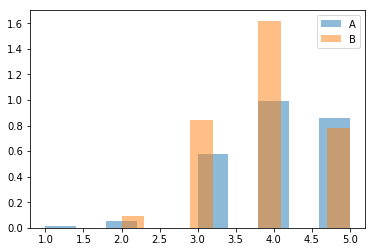

line btw 4&5 - 0.16 a: 4.0588235294117645 vs. b: 3.9424460431654675


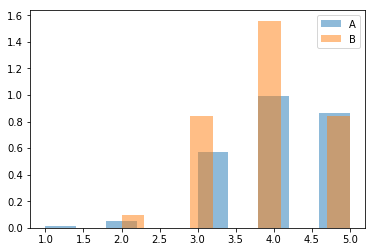

line btw 5&6 - 0.1 a: 4.072847682119205 vs. b: 3.943502824858757


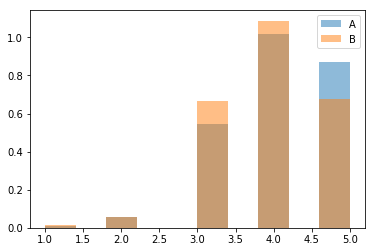

line btw 6&7 - 0.25 a: 4.0643939393939394 vs. b: 3.9767441860465116


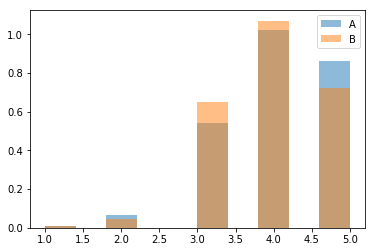

line btw 7&8 - 0.25 a: 4.070796460176991 vs. b: 3.984189723320158


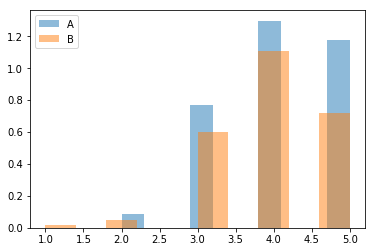

line btw 8&9 - 0.13 a: 4.095744680851064 vs. b: 3.979381443298969


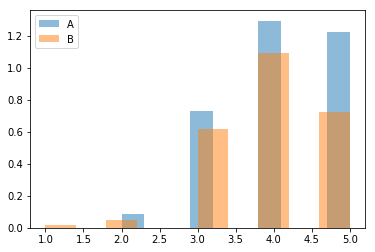

line btw 9&10 - 0.07 a: 4.126666666666667 vs. b: 3.978723404255319


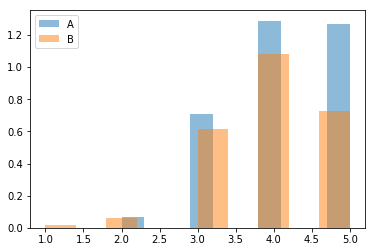

line btw 10&11 - 0.18 a: 4.116071428571429 vs. b: 3.997275204359673


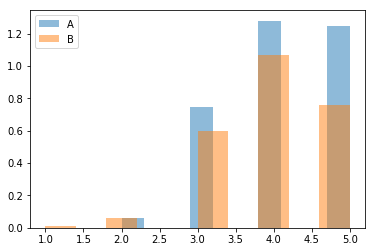

line btw 11&12 - 0.64 a: 4.066666666666666 vs. b: 4.017326732673268


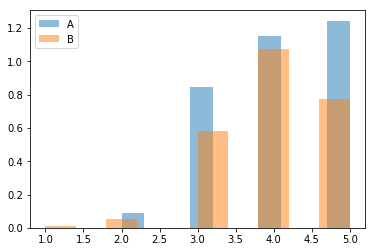

line btw 12&13 - 0.4 a: 4.135135135135135 vs. b: 4.015837104072398


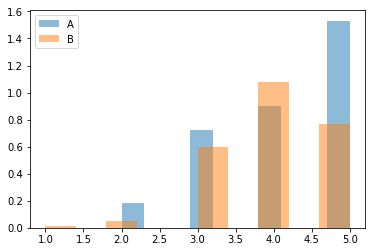

In [117]:
for each_cut in range(1, df['Week'].nunique()): 
    a_list=df[df['Week']>each_cut]
    b_list=df[df['Week']<=each_cut]
#     plt.hist(a_list['Overall Satisfaction'], weights=np.ones(len(a_list)) / len(a_list), alpha=0.5, label='A')
#     plt.hist(b_list['Overall Satisfaction'], weights=np.ones(len(b_list)) / len(b_list), alpha=0.5, label='B')
    plt.hist(a_list['Overall Satisfaction'], density=True, alpha=0.5, label='A')
    plt.hist(b_list['Overall Satisfaction'], density=True, alpha=0.5, label='B')
    t, p=sts.ttest_ind(a_list['Overall Satisfaction'], b_list['Overall Satisfaction'])
    print(f"line btw {each_cut}&{each_cut+1} - {round(p, 2)} a: {a_list['Overall Satisfaction'].mean()} vs. b: {b_list['Overall Satisfaction'].mean()}")
    plt.legend()
    plt.show()

line btw 1&2 - 0.69 a: 4.029478458049887 vs. b: 3.973684210526316


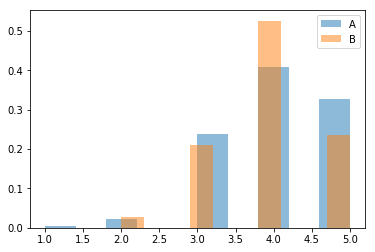

line btw 2&3 - 0.46 a: 4.037220843672457 vs. b: 3.960526315789474


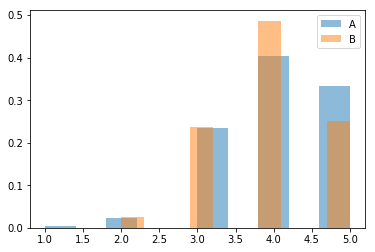

line btw 3&4 - 0.16 a: 4.053763440860215 vs. b: 3.925233644859813


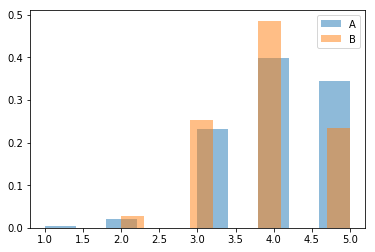

line btw 4&5 - 0.16 a: 4.0588235294117645 vs. b: 3.9424460431654675


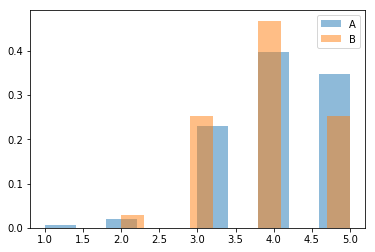

line btw 5&6 - 0.1 a: 4.072847682119205 vs. b: 3.943502824858757


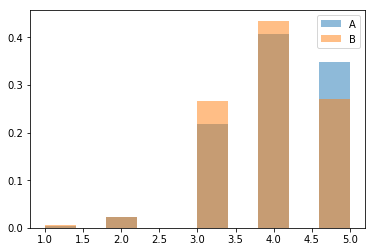

line btw 6&7 - 0.25 a: 4.0643939393939394 vs. b: 3.9767441860465116


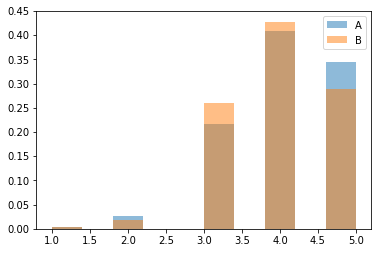

line btw 7&8 - 0.25 a: 4.070796460176991 vs. b: 3.984189723320158


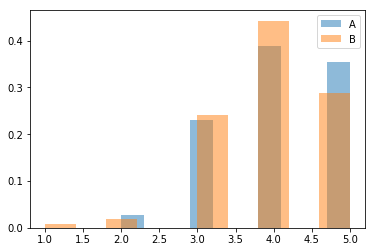

line btw 8&9 - 0.13 a: 4.095744680851064 vs. b: 3.979381443298969


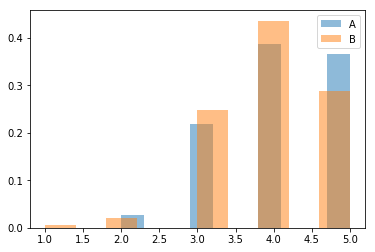

line btw 9&10 - 0.07 a: 4.126666666666667 vs. b: 3.978723404255319


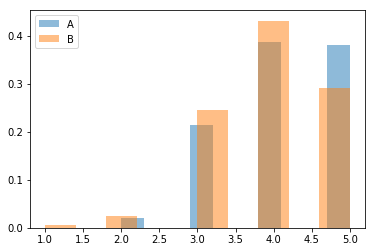

line btw 10&11 - 0.18 a: 4.116071428571429 vs. b: 3.997275204359673


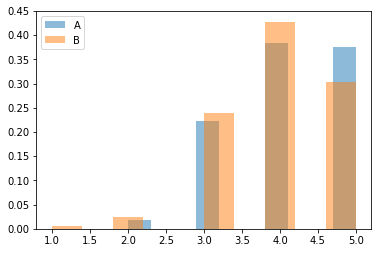

line btw 11&12 - 0.64 a: 4.066666666666666 vs. b: 4.017326732673268


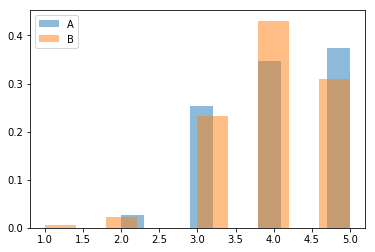

line btw 12&13 - 0.4 a: 4.135135135135135 vs. b: 4.015837104072398


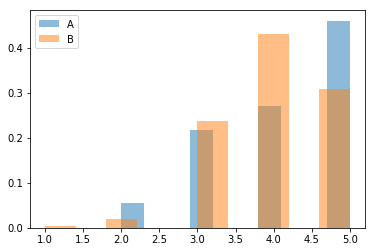

In [118]:
for each_cut in range(1, df['Week'].nunique()): 
    a_list=df[df['Week']>each_cut]
    b_list=df[df['Week']<=each_cut]
    plt.hist(a_list['Overall Satisfaction'], weights=np.ones(len(a_list)) / len(a_list), alpha=0.5, label='A')
    plt.hist(b_list['Overall Satisfaction'], weights=np.ones(len(b_list)) / len(b_list), alpha=0.5, label='B')
#     plt.hist(a_list['Overall Satisfaction'], density=True, alpha=0.5, label='A')
#     plt.hist(b_list['Overall Satisfaction'], density=True, alpha=0.5, label='B')
    t, p=sts.ttest_ind(a_list['Overall Satisfaction'], b_list['Overall Satisfaction'])
    print(f"line btw {each_cut}&{each_cut+1} - {round(p, 2)} a: {a_list['Overall Satisfaction'].mean()} vs. b: {b_list['Overall Satisfaction'].mean()}")
    plt.legend()
    plt.show()

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
feature_columns=['Overall Satisfaction', 'Class Pace', 
                 'Academic Support', 'Apply Learning Outside Class', 
                 'Instructor Engagement', 'Instructor Clarity', 
                 'Instructor Knowledge', 'Homework Feedback Rating', 
                 'Outside Time Spent']
X=df[feature_columns].drop(columns=['Overall Satisfaction'])
lb=LabelEncoder()
X['Outside Time Spent']=lb.fit_transform(X['Outside Time Spent'])
Y=df['Overall Satisfaction']
# clf=RandomForestClassifier()
clf=DecisionTreeClassifier()
clf.fit(X, Y)
display(sorted(list(zip(clf.feature_importances_, X.columns)), reverse=True))
clf.score(X, Y)

[(0.24875625889405986, 'Instructor Clarity'),
 (0.1555495892296451, 'Apply Learning Outside Class'),
 (0.12040125292877984, 'Class Pace'),
 (0.11902478805778566, 'Instructor Knowledge'),
 (0.10940177653483277, 'Homework Feedback Rating'),
 (0.10254539280141475, 'Outside Time Spent'),
 (0.08470793393347605, 'Academic Support'),
 (0.05961300762000588, 'Instructor Engagement')]

0.9722222222222222

In [189]:
df[feature_columns].corr()

,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating,Outside Time Spent
Overall Satisfaction,1.000000,0.173225,0.554195,0.506035,0.592328,0.633679,0.540757,0.380128,-0.154410
Class Pace,0.173225,1.000000,0.145496,-0.016478,0.267007,0.213992,0.352332,0.183133,-0.242662
Academic Support,0.554195,0.145496,1.000000,0.333132,0.543029,0.495884,0.504615,0.225899,-0.160439
Apply Learning Outside Class,0.506035,-0.016478,0.333132,1.000000,0.447586,0.409401,0.208229,0.276007,-0.025961
Instructor Engagement,0.592328,0.267007,0.543029,0.447586,1.000000,0.706742,0.583341,0.318553,-0.215087
Instructor Clarity,0.633679,0.213992,0.495884,0.409401,0.706742,1.000000,0.601680,0.268630,-0.155420
Instructor Knowledge,0.540757,0.352332,0.504615,0.208229,0.583341,0.601680,1.000000,0.164873,-0.300850
Homework Feedback Rating,0.380128,0.183133,0.225899,0.276007,0.318553,0.268630,0.164873,1.000000,-0.275101
Outside Time Spent,-0.154410,-0.242662,-0.160439,-0.025961,-0.215087,-0.155420,-0.300850,-0.275101,1.000000


In [99]:
def get_week_of(sub_date): 
    dow=sub_date.dayofweek
    if dow<2: 
        week_of=sub_date-timedelta(days=dow+7)
    else: 
        week_of=sub_date-timedelta(days=dow)
    return week_of

In [100]:
sub=pd.to_datetime(df['Submission Date'])
# sub-pd.Timedelta(days=sub.dt.dayofweek)
# df['Submission Date'].dtype#.map(lambda x: x-x.dow)
# for idx, row in sub.iteritems(): 
#     print(row-row.dayofweek)
df['Week of']=sub.apply(lambda x: x-timedelta(days=x.dayofweek))
df['Week of 2']=sub.apply(get_week_of)
df['DOW']=sub.dt.dayofweek
df.head()

,Submission Date,Week,Student Name,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating,Outside Time Spent,Week of,DOW,Week of 2
0,12-06-2020,1,Simon Xu,3,3,4,4,4,3,3,3,15-20 hrs,2020-11-30,6,2020-11-30
1,12-06-2020,1,Sara Kayhan,4,4,4,4,4,5,5,0,6-10 hrs,2020-11-30,6,2020-11-30
2,12-06-2020,1,Renuka Kafle,4,4,5,4,5,5,4,0,6-10 hrs,2020-11-30,6,2020-11-30
3,12-06-2020,1,Erich Mitchell,4,2,3,5,4,5,4,3,0-5 hrs,2020-11-30,6,2020-11-30
4,12-06-2020,1,Jennifer-Rose Davis,5,3,5,5,5,5,5,4,+20 hrs,2020-11-30,6,2020-11-30


In [101]:
df.columns

Index(['Submission Date', 'Week', 'Student Name', 'Overall Satisfaction',
       'Class Pace', 'Academic Support', 'Apply Learning Outside Class',
       'Instructor Engagement', 'Instructor Clarity', 'Instructor Knowledge',
       'Homework Feedback Rating', 'Outside Time Spent', 'Week of', 'DOW',
       'Week of 2'],
      dtype='object')

In [102]:
df.head()

,Submission Date,Week,Student Name,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating,Outside Time Spent,Week of,DOW,Week of 2
0,12-06-2020,1,Simon Xu,3,3,4,4,4,3,3,3,15-20 hrs,2020-11-30,6,2020-11-30
1,12-06-2020,1,Sara Kayhan,4,4,4,4,4,5,5,0,6-10 hrs,2020-11-30,6,2020-11-30
2,12-06-2020,1,Renuka Kafle,4,4,5,4,5,5,4,0,6-10 hrs,2020-11-30,6,2020-11-30
3,12-06-2020,1,Erich Mitchell,4,2,3,5,4,5,4,3,0-5 hrs,2020-11-30,6,2020-11-30
4,12-06-2020,1,Jennifer-Rose Davis,5,3,5,5,5,5,5,4,+20 hrs,2020-11-30,6,2020-11-30


In [103]:
df[['Submission Date', 'Week', 'DOW', 'Week of', 'Week of 2']].drop_duplicates()

,Submission Date,Week,DOW,Week of,Week of 2
0,12-06-2020,1,6,2020-11-30,2020-11-30
5,12-07-2020,1,0,2020-12-07,2020-11-30
23,12-08-2020,1,1,2020-12-07,2020-11-30
39,12-13-2020,2,6,2020-12-07,2020-12-07
47,12-14-2020,2,0,2020-12-14,2020-12-07
58,12-15-2020,2,1,2020-12-14,2020-12-07
78,11-12-2020,3,3,2020-11-09,2020-11-09
79,12-20-2020,3,6,2020-12-14,2020-12-14
85,12-21-2020,3,0,2020-12-21,2020-12-14
96,12-22-2020,3,1,2020-12-21,2020-12-14


In [98]:
df.tail()

,Submission Date,Week,Student Name,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating,Outside Time Spent,Week of,DOW,Week of 2
306,02-01-2021,9,Felix Pronove,4,4,4,4,4,4,4,0,15-20 hrs,2021-02-01,0,2021-02-01
307,02-01-2021,9,Ric Martinez,4,4,3,4,4,4,4,4,11-15 hrs,2021-02-01,0,2021-02-01
308,02-01-2021,9,Mark Blankenship,3,4,3,3,4,4,4,2,+20 hrs,2021-02-01,0,2021-02-01
309,02-01-2021,9,Anna Sours,3,3,4,2,3,2,3,2,15-20 hrs,2021-02-01,0,2021-02-01
310,02-01-2021,9,Swati Dham,4,4,5,5,4,4,5,5,11-15 hrs,2021-02-01,0,2021-02-01


In [366]:
stats_cols=['Overall Satisfaction', 'Class Pace', 'Academic Support',
       'Apply Learning Outside Class', 'Instructor Engagement',
       'Instructor Clarity', 'Instructor Knowledge',
       'Homework Feedback Rating']#, 'Outside Time Spent']

In [87]:
df.groupby('Week')[stats_cols].mean()

,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating
Week,,,,,,,,
1,4.000000,3.307692,4.179487,3.846154,4.025641,4.128205,4.384615,1.794872
2,3.923077,3.512821,4.128205,3.307692,4.102564,3.923077,4.435897,1.923077
3,3.774194,3.709677,3.903226,3.193548,3.967742,4.032258,4.419355,2.967742
4,4.000000,3.875000,3.937500,3.562500,4.000000,4.000000,4.312500,3.156250
5,3.871795,3.615385,3.666667,3.435897,3.641026,3.666667,3.923077,3.076923
6,4.105263,3.868421,4.078947,3.552632,4.184211,4.184211,4.473684,3.105263
7,4.000000,3.815789,4.210526,3.394737,4.184211,4.157895,4.394737,3.526316
8,3.948718,4.051282,4.076923,3.307692,4.000000,3.846154,4.410256,3.564103
9,3.750000,3.875000,3.875000,3.375000,4.000000,3.500000,4.250000,2.187500


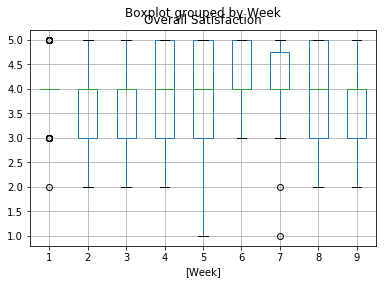

In [104]:
df[['Week', 'Overall Satisfaction']].boxplot(by='Week')

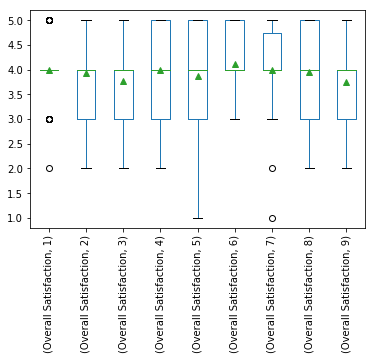

In [89]:
df[['Overall Satisfaction', 'Week']].pivot(columns='Week').plot(kind='box', rot=90, showmeans=True)

In [90]:
df[['Week', 'Overall Satisfaction']].groupby('Week').mean()

,Overall Satisfaction
Week,
1,4.000000
2,3.923077
3,3.774194
4,4.000000
5,3.871795
6,4.105263
7,4.000000
8,3.948718
9,3.750000


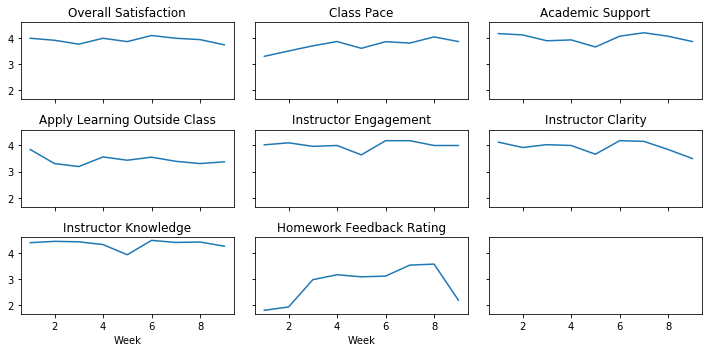

In [91]:
ncols=3
nrows=math.ceil(len(stats_cols)/ncols)
fig, ax=plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(10, 5))
for idx, each_col in enumerate(stats_cols): 
#     print(f'ax{math.floor(idx/ncols)}{idx%ncols}')
    df[[each_col, 'Week']].groupby('Week').mean().plot(ax=ax[math.floor(idx/ncols)][idx%ncols], legend=None)
    ax[math.floor(idx/ncols)][idx%ncols].set_title(each_col)
#     ax[math.floor(idx/ncols)][idx%ncols].legend(show=False)
plt.tight_layout()

# Title

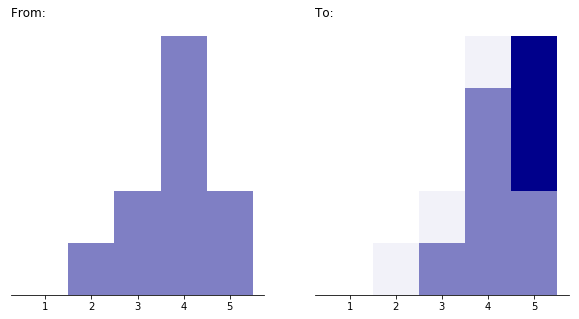

In [302]:
crt_sample_list=[2, 
            3, 3,  
            4, 4, 4, 4, 4, 
            5, 5]
tgt_sample_list=[3,   
            4, 4, 4, 4, 
            5, 5, 5, 5, 5]
miss_list=[2, 
          3, 
          4]
add_list=[5, 5, 5]
bins=range(1, 7)
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(crt_sample_list, bins=bins, align='left', alpha=.5, color='darkblue')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].get_yaxis().set_ticks([])
ax[0].set_title('From:     ', loc='left')
ax[1].hist(tgt_sample_list, bins=bins, align='left', stacked=True, alpha=.5, color='darkblue')
ax[1].hist(miss_list, bins=bins, align='left', alpha=.05, bottom=[0, 0, 1, 4, 0], color='darkblue')
ax[1].hist(add_list, bins=bins, align='left', alpha=1, bottom=[0, 0, 0, 0, 2], color='darkblue')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].get_yaxis().set_ticks([])
ax[1].set_title('To:     ', loc='left')
# fig.suptitle('Improve Customer Satisfaction', size=30, verticalalignment='bottom')
# ax[0].annotate('Improve Customer Satisfaction', (5, 3), )
# fig.tight_layout(pad=5)
plt.show()

In [360]:
ncols=3
nrows=math.ceil(len(stats_cols)/ncols)
bins=range(6)
fig, ax=plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(10, 5))
for idx, each_col in enumerate(stats_cols): 
#     print(f'ax{math.floor(idx/ncols)}{idx%ncols}')
    df[each_col].plot(kind='hist', ax=ax[math.floor(idx/ncols)][idx%ncols], bins=bins, align='right')
#     df[[each_col, 'Week']].groupby('Week').mean().plot(ax=ax[math.floor(idx/ncols)][idx%ncols], legend=None)
    ax[math.floor(idx/ncols)][idx%ncols].set_title(each_col)
#     ax[math.floor(idx/ncols)][idx%ncols].legend(show=False)

plt.tight_layout()

NameError: name 'stats_cols' is not defined

(3, 5)

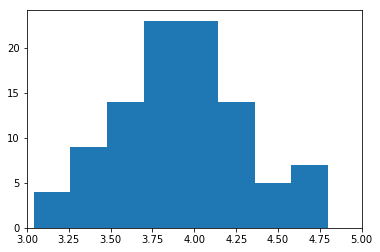

In [208]:
sample_means=[]
for i in range(100): 
    sample_means.append(df['Overall Satisfaction'].sample(5).mean())
plt.hist(sample_means)
plt.xlim([3, 5])

In [303]:
display(df['Overall Satisfaction'].mean())
display(df['Overall Satisfaction'].median())
display(df['Overall Satisfaction'].mode())

3.945337620578778

4.0

0    4
dtype: int64

In [183]:
display(len(df[df['Overall Satisfaction']==4]))
display(len(df))
print(f'{82/311}')
print(f'{141/311}')

141

311

0.26366559485530544
0.4533762057877814


In [304]:
df['Overall Satisfaction'].values.mean()

3.945337620578778

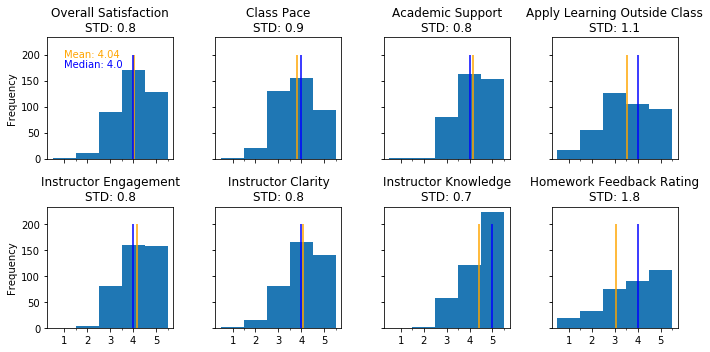

In [380]:
bins=list(range(1, 6))
bins_loc=[bin+0.5 for bin in bins]
# df['Overall Satisfaction'].hist(bins=bins, figsize=(3.5, 8))
# plt.vlines([df['Overall Satisfaction'].values.mean()+.5, np.median(df['Overall Satisfaction'].values)+.5], 0, 200, colors=['orange', 'blue'])
# plt.xticks(bins_loc, bins)
# plt.annotate(f'Mean: {round(df["Overall Satisfaction"].values.mean(), 2)}', (1.5, 175), color='orange', size=15)
# plt.annotate(f'Median: {round(np.median(df["Overall Satisfaction"].values), 2)}', (1.5, 160), color='blue', size=15)
# # plt.annotate(f'Mode: {np.round(sts.mode(df["Overall Satisfaction"].values)[-1], 2)}', (1.5, 175), size=15)
# plt.title(f'Overall Satisfaction\nSTD: {round(np.std(df["Overall Satisfaction"].values), 2)}')
# plt.grid(None)
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.show()
short_cols=[stat for stat in stats_cols if stat != 'Overall Satisfaction']
ncols=4
nrows=math.ceil(len(short_cols)/ncols)
bins=list(range(1, 7))
fig, ax=plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(10, 5))
for idx, each_col in enumerate(stats_cols): 
    df[each_col].plot(kind='hist', ax=ax[math.floor(idx/ncols)][idx%ncols], bins=bins)
    ax[math.floor(idx/ncols)][idx%ncols].vlines([df[each_col].values.mean()+.5, np.median(df[each_col].values)+.5], 0, 200, colors=['orange', 'blue'])
    ax[math.floor(idx/ncols)][idx%ncols].set_title(f'{each_col}\nSTD: {round(np.std(df[each_col].values), 1)}')
    ax[math.floor(idx/ncols)][idx%ncols].set_xticklabels(bins)
    ax[math.floor(idx/ncols)][idx%ncols].set_xticks(bins_loc)

ax[0][0].annotate(f'Mean: {round(df["Overall Satisfaction"].values.mean(), 2)}', (1.5, 195), color='orange', size=10)
ax[0][0].annotate(f'Median: {round(np.median(df["Overall Satisfaction"].values), 2)}', (1.5, 175), color='blue', size=10)

plt.tight_layout()

In [168]:
df[stats_cols].median()

Overall Satisfaction            4.0
Class Pace                      4.0
Academic Support                4.0
Apply Learning Outside Class    3.0
Instructor Engagement           4.0
Instructor Clarity              4.0
Instructor Knowledge            5.0
Homework Feedback Rating        3.0
dtype: float64

In [169]:
df[stats_cols].mean()

Overall Satisfaction            3.945338
Class Pace                      3.723473
Academic Support                4.019293
Apply Learning Outside Class    3.450161
Instructor Engagement           4.012862
Instructor Clarity              3.964630
Instructor Knowledge            4.337621
Homework Feedback Rating        2.842444
dtype: float64

In [130]:
df[stats_cols].mode()

,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating
0,4,4,4,3,4,4,5,5


In [139]:
df['Overall Satisfaction'].value_counts()

4    141
5     82
3     79
2      7
1      2
Name: Overall Satisfaction, dtype: int64